#### This tutorial introduces how to create basic visualizations of a large data set using Python. 
#### Note: You do not need to understand the Python code or be able to write code to complete this tutorial and pass the challenge.
#### Remember to hit Shift+Enter in all the code cells.

<div class="alert alert-block alert-info">A cell like this indicates a question you need to answer for this Challenge on the U4I platform. Please answer the question <b>before</b> continuing through the notebook.</div>

# Introduction

The World Happiness Report is survey of global happiness. It contains articles and rankings of happiness based on participants' ratings of their own lives. 
Happiness is based on a survey in which nationally representative samples of participants are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors.

In this tutorial, we will try to answer some questions by creating visualizations of the data:
- Which countries and regions of the world are happiest?
- What factors contribute to a country's/region's happiness ranking?
- How did happiness change from 2016 to 2019?

<b>We will work through a few different visualizations (listed below). You can follow these links to jump directly to a particular section/visualization.</b>
* [Variables](#1)
* [Import Libraries](#2)
* [Load & Preview Data](#3)
* [Bar Graph](#4)
* [Violin Plot](#5)
* [Box Plot](#6)
* [Scatter Plot](#7)
* [Pair Plot](#8) 
* [Heat Map](#9)
* [Interactive Bubble Plot](#10)
* [Sources](#11)

<a id=1></a>
## Variables
[[ go back to the top ]](#Table-of-contents)

Although the original report and data sets contain much more data, we will focus on the following variables in this tutorial.
* **Country**: Name of the country
* **Region**: Region the country belongs to
* **Happiness_Score**: Participants were asked: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”

We will also consider some factors that potentially contribute to Happiness_Score:
* **Economy**: GDP per capita
* **Health**: Average life expectancy
* **Family**: Measured via the binary question: “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
* **Freedom**: Measured via the binary question: “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
* **Trust**: Measured via the binary questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” 
* **Generosity**: The residual of regressing responses to the binary question: “Have you donated money to a charity in the past month?” on GDP per capita

Note: These variables are taken from a number of diffrent measurements and some have been altered and standardized so that the data set can be analyzed. There are various ways in which the data sets can be interpreted and analyzed and this tutorial uses simplified data sets and analyses for the purposes of demonstrating data visulizations. For full reports and statistical analyses, please visit https://worldhappiness.report/.

<div class="alert alert-block alert-info">Pause! Answer <b>Q1 in the Answers.txt file</b>.
    
    Which variables do you think relate to Happiness_Score the most? Why?

<a id=2></a>
## Import Libraries
[[ go back to the top ]](#Table-of-contents)

In [16]:
# import Pandas library and call it 'pd' for analyzing & visualizing data
import pandas as pd
from pandas.plotting import autocorrelation_plot

# import matplotlib.plplot and call it 'plt' for plotting data
import matplotlib.pyplot as plt
%matplotlib inline

#import numpy and call it 'np' for scientific computing
import numpy as np

#import seaborn and call it 'sns' for visualizations
import seaborn as sns 

#import libraries for interactive viaulizations
from IPython.display import HTML
from bubbly.bubbly import bubbleplot
import plotly.offline as py
import plotly.graph_objs as go

import warnings            
warnings.filterwarnings("ignore") 

ModuleNotFoundError: No module named 'bubbly'

<a id=3></a>
## Load & Preview Data
[[ go back to the top ]](#Table-of-contents)

In [17]:
#Load data from csv files and assign to "data_2016", "data_2017", "data_2018", "data_2019"
data_2016=pd.read_csv("2016.csv")
data_2017=pd.read_csv("2017.csv")
data_2018=pd.read_csv("2018.csv")
data_2019=pd.read_csv("2019.csv")

In [18]:
#Show the first 5 rows of data_2016
data_2016.head()

,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [19]:
#Show the first 5 rows of data_2017
data_2017.head()

,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
0,Norway,Western Europe,7.537,1.616463,1.533524,0.796666,0.635423,0.362012,0.315964
1,Denmark,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [20]:
data_2018.head()

,Country,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [21]:
data_2019.head()

,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Looking at the first few rows of data, it's still hard to make any conclusions from just looking at the numbers.\
This is exactly why data visualizations are so powerful. Let's get let's started!

<a id=4></a>
## Bar Graph
[[ go back to the top ]](#Table-of-contents)

#### Let's start with an easy question: <b>What were the happiest countries in 2016?</b>

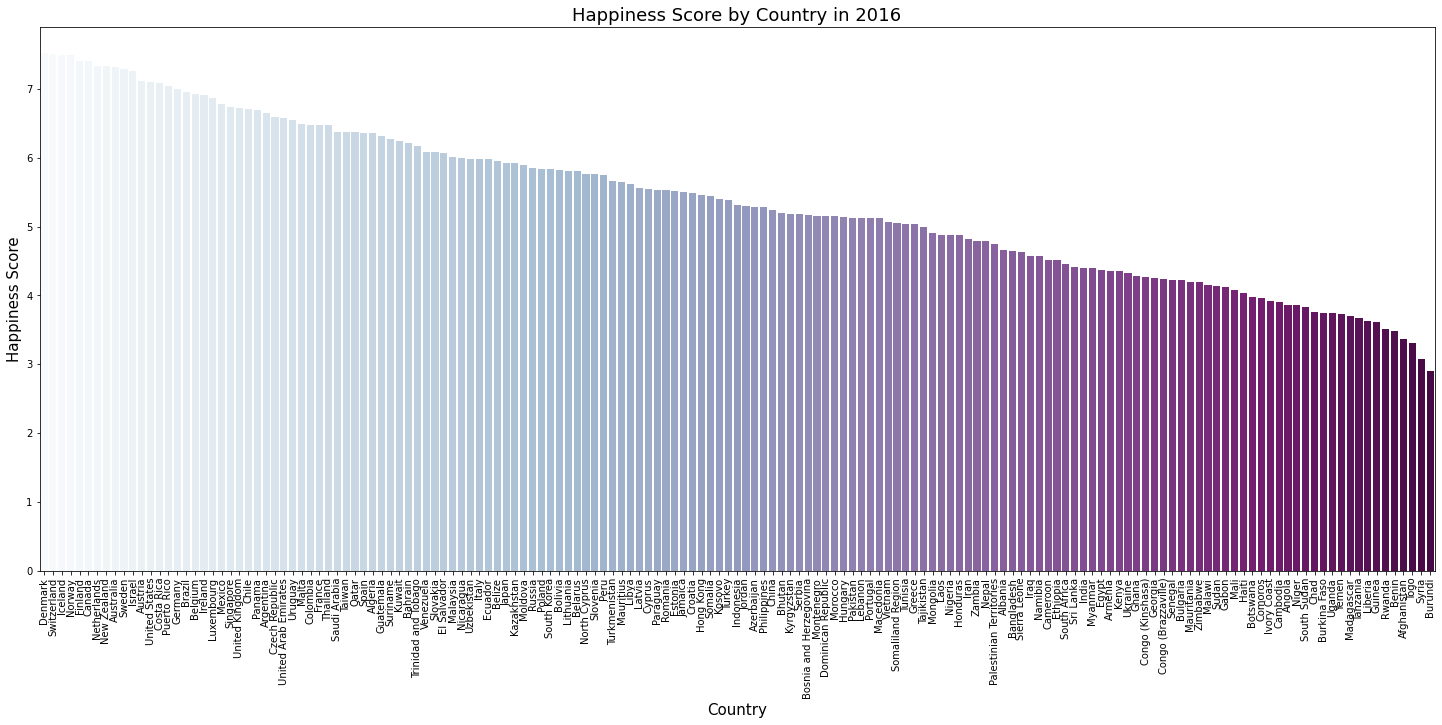

In [22]:
#Set figure size
plt.figure(figsize=(25,10))

#Create bar graph
sns.barplot(x=data_2016['Country'], y=data_2016['Happiness_Score'], palette="BuPu")

#Set axes and title
plt.xticks(rotation= 90)
plt.xlabel('Country', size = 15)
plt.ylabel('Happiness Score', size = 15)
plt.title('Happiness Score by Country in 2016', size = 18)

plt.show()

We can see the happiest country in 2019 was Denmark, and the least happiest country was Burundi.\
\
But this graph has a lot of information, so let's try to condense it by grouping countries by region and creating a new variable "region_happiness_ratio" (the sum of happiness_score for all the countries in a region divided by the number of countries in the region).\
\
To do this, we will create a new data frame, which is a table in which each column contains values of one variable and each row contains one set of values from each column. 

In [23]:
#Create new data frame "sorted_data_2016" with region and region_happiness_ratio_2016
region_lists=list(data_2016['Region'].unique())
region_happiness_ratio_2016=[]
for each in region_lists:
    region=data_2016[data_2016['Region']==each]
    region_happiness_rate_2016=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio_2016.append(region_happiness_rate_2016)
   
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio_2016':region_happiness_ratio_2016})
new_index=(data['region_happiness_ratio_2016'].sort_values(ascending=False)).index.values
sorted_data_2016 = data.reindex(new_index)

#### Let's visualize our condensed data: <b>What were the happiest regions of the world in 2016?</b>

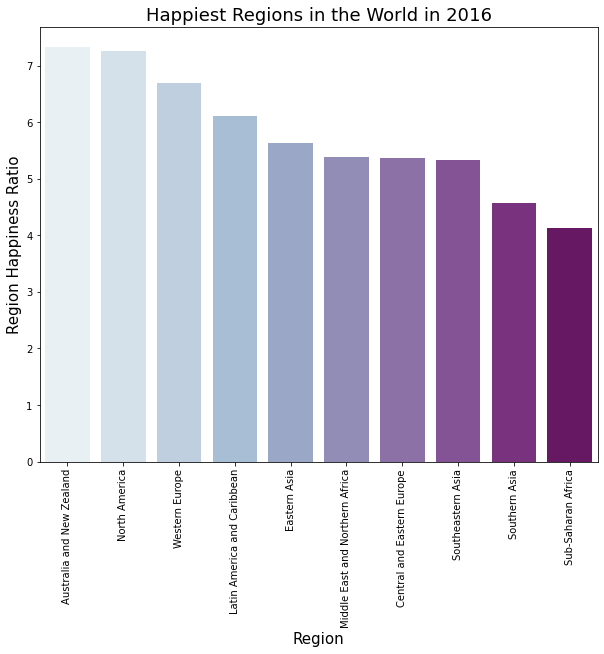

In [24]:
#Set figure size
plt.figure(figsize=(10,8))

#Create bar graph
sns.barplot(x=sorted_data_2016['region'], y=sorted_data_2016['region_happiness_ratio_2016'], palette="BuPu")

#Set axes and title
plt.xticks(rotation= 90)
plt.xlabel('Region', size = 15)
plt.ylabel('Region Happiness Ratio', size = 15)
plt.title('Happiest Regions in the World in 2016', size = 18)

plt.show()

<div class="alert alert-block alert-info">Pause!
Create another bar graph for the region happiness ratio in 2019 (use the code cell below) and answer <b>Q2 in the Answers.txt file</b>. Note: The code for a new data frame called "sorted_data_2019" is already entered in the code cell below.
    
    What were the 3 happiest regions in 2019?

In [25]:
#Create new data frame "sorted_data_2019" with region and region_happiness_ratio_2019
region_lists=list(data_2019['Region'].unique())
region_happiness_ratio_2019=[]
for each in region_lists:
    region=data_2019[data_2019['Region']==each]
    region_happiness_rate_2019=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio_2019.append(region_happiness_rate_2019)
   
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio_2019':region_happiness_ratio_2019})
new_index=(data['region_happiness_ratio_2019'].sort_values(ascending=False)).index.values
sorted_data_2019 = data.reindex(new_index)

# your code here

<a id=6></a>
## Box Plot
[[ go back to the top ]](#Table-of-contents)

A box plot displays the distribution of a data set. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”.

Let's look at the `Happiness_Score` across years.

#### <b>Did regional `Happiness_Score` change from 2016 to 2019?</b>

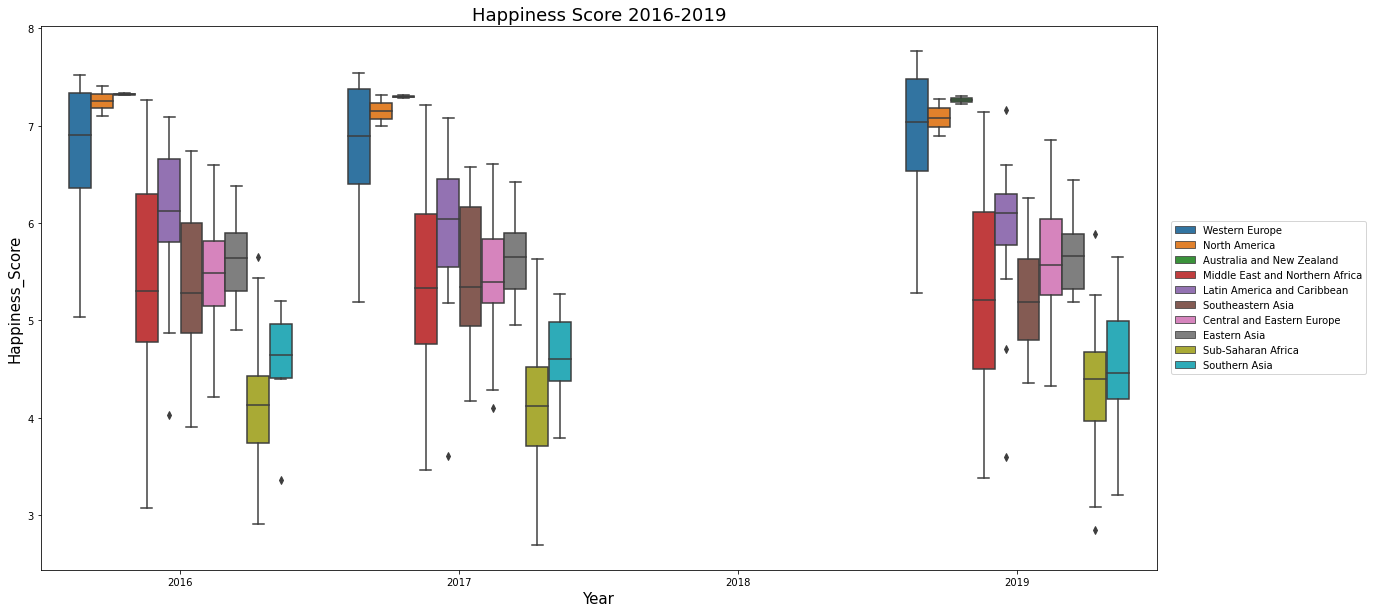

In [26]:
#combine all 4 data sets into one "data_concat" and add variable "Year"
data_2016['Year']=2016
data_2017['Year']=2017
data_2018['Year']=2018
data_2019['Year']=2019
data_concat=pd.concat([data_2016,data_2017,data_2018,data_2019],axis=0,sort = False)

#Create box plot
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="Year" , y="Happiness_Score", hue="Region",data=data_concat,ax=ax)
plt.xlabel('Year', size = 15)
plt.ylabel('Happiness_Score', size = 15)
plt.title('Happiness Score 2016-2019', size = 18)

#Format legend location
plt.legend(bbox_to_anchor=(1, 0.4, 0.2, 0.2), loc='center')

plt.show()

We can see that regional happiness didn't change drastically from 2016 to 2019.

<div class="alert alert-block alert-info">Pause! Answer <b>Q3 in the Answers.txt file</b>.
    
    Why is there no visualization for 2018? Hint: Look back at the variable names (column names) in each data set in the Load & Preview Data section.
</div>

[[go to Load & Preview Data ]](#Load-&-Preview-Data)

<a id=5></a>
## Violin Plot
[[ go back to the top ]](#Table-of-contents)

A violin plot is similar to a box plot in that it shows the mean, meadian, and minimum and maximum values, but it also shows the probability density of the data at different values, which can be useful if the data set has more than one peak (i.e., multimodal) in the distribution. 

<img src="Boxplot_violinplot.png" align="left"/>

<a href="https://towardsdatascience.com/violin-plots-explained-fb1d115e023d">Source</a>

#### <b>What is the distribution of the Economy, Family, and Freedom in 2016?</b>

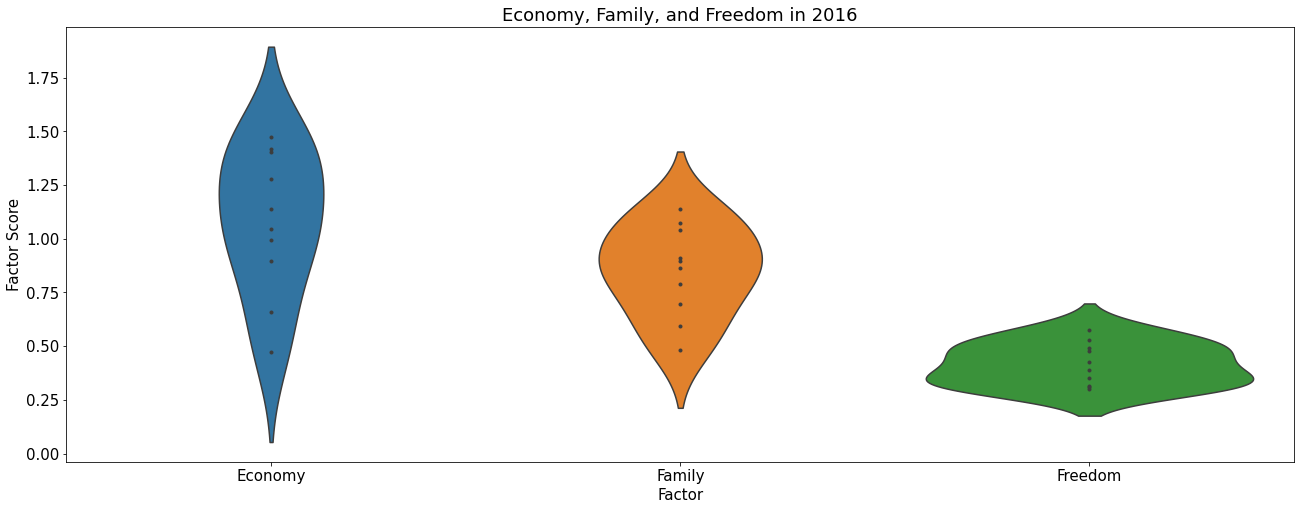

In [27]:
#Create new data frame "data_2016_violin"
data_2016_violin=pd.pivot_table(data_2016, index = 'Region', values=["Economy","Family","Freedom"])

#Set figure size
f,ax=plt.subplots(figsize=(22,8))

#Create violin plot
sns.violinplot(data=data_2016_violin, inner="points")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Factor', size = 15)
plt.ylabel('Factor Score', size = 15)
plt.title('Economy, Family, and Freedom in 2016', size = 18)

plt.show()

<div class="alert alert-block alert-info">Pause! Create another violin plot (use the code cell below) for data_2019 and answer <b>Q4 in the Answers.txt file</b>. Note: The code for a new data frame called "sorted_data_2019" is already entered in the code cell below.
    
    Save a screenshot of your violin plot. Why do you think Freedom has two peaks?

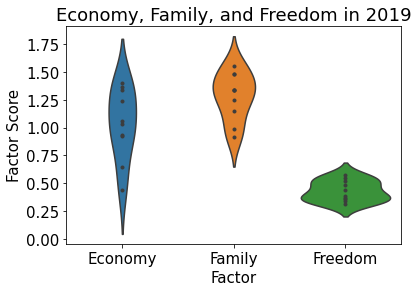

In [31]:
#Create new data frame "data_2019_violin"
data_2019_violin=pd.pivot_table(data_2019, index = 'Region', values=["Economy","Family", "Freedom"])

# your code here

# Uncomment the next line to save your graph as a png
# f.savefig('violinplot.png')

<a id=7></a>
## Scatter Plot
[[ go back to the top ]](#Table-of-contents)

A scatter plot can be used to visualize whether there is a correlation (relationship) between two variables (i.e., whether the increase or decrease in one varaible depends on the increase or decrease of the other variable.\

#### <b>What was the relationship between `Economy` and `Happiness_Score` in 2019?</b>

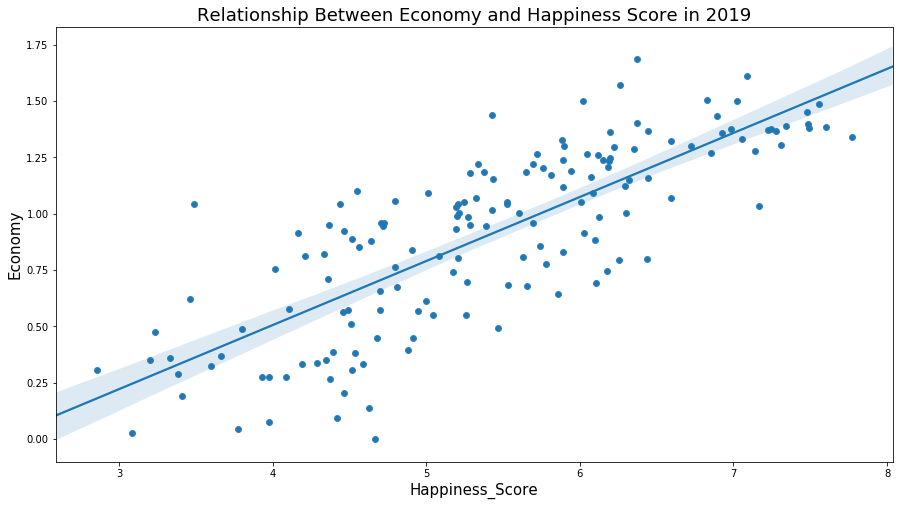

In [15]:
#Create scatter plot for economy and happiness_score for data_2019
f,ax = plt.subplots(figsize = (15,8))
sns.scatterplot(x=data_2019["Happiness_Score"], y=data_2019["Economy"])

#Format title and axes
plt.title("Relationship Between Economy and Happiness Score in 2019", size=18)
plt.xlabel('Happiness_Score', size = 15)
plt.ylabel('Economy', size = 15)

#Add line of best fit
sns.regplot(x='Happiness_Score',y='Economy', data=data_2019)

plt.show()


We have included a line of best fit (or regression line) in the scatter plot to better visualize the relationship. We can see that the slope of the regression line is positive, which indicated a correlation: higher Economy scores correlate with higher Happiness scores.

<div class="alert alert-block alert-info">Pause! Create another scatter plot for Happiness_Score and Generosity in 2019 (use the code cell below), take a screenshot, and answer <b>Q5 in the Answers.txt file</b>.
    
    Save a screenshot of your scatter plot, and explain what the scatter plot is showing (e.g., positive, negative, no relationship).

In [ ]:
# your code here

# Uncomment the next line to save your graph as a png
# plt.savefig('scatterplot.png')

<a id=8></a>
## Scatterplot Matrix (Pair Plot)
[[ go back to the top ]](#Table-of-contents)

A scatterplot matrix plots the histograms of each column along the diagonal, and a matrix of scatterplots for the combination of any two attributes. This allows us to see the distribution of single variables and the relationships between variables for all the variables in a data set.\
\
Scatterplot matrices are useful for identifying trends to follow up on in large data sets with several variables.

#### <b>What are the relationships between 4 factors: `economy`, `family`, `health`, and `freedom`?</b>

In [ ]:
#drop columns from data sets to only include variables of interest
data_2016_reduced = data_2016.drop(['Generosity', 'Trust', 'Year'], axis=1)
data_2017_reduced = data_2017.drop(['Generosity', 'Trust', 'Year'], axis=1)
data_2018_reduced = data_2018.drop(['Generosity', 'Trust', 'Year'], axis=1)
data_2019_reduced = data_2019.drop(['Generosity', 'Trust', 'Year'], axis=1)

In [ ]:
#Create a pair plot for data_2019_reduced
sns.pairplot(data_2019_reduced, hue="Region")
plt.show()

<div class="alert alert-block alert-info">Pause! Answer <b>Q6 in the Answers.txt file</b>.
    
    What do you notice about the pair plot? 
    What might be a problem of plotting this particular data set in this way?

<a id=9></a>
## Heat Map
[[ go back to the top ]](#Table-of-contents)

We can also visualize correlations between variables with a heat map.\
A heat map shows the magnitude of a relationship as color.

In [ ]:
#Remove column Year from data frame
del data_2019['Year']

#Create heat map for data_2019_reduced
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data_2019.corr(),annot=True, cmap="BuPu")
plt.show()

In this heat map, lighter colors represent a lower correlation (a weaker relationship) and darker colors represent a higher correlation (a stronger relationship).\
The diagnoal represents variables correlated with themselves.\
Keep in mind that a correlation is simply an association between two variables, wheher it be positive or negative, and does not indicate causality.

<div class="alert alert-block alert-info">Pause! Create another heat map for "data_2016_reduced" (use the code cell below) and answer <b>Q7 in the Answers.txt file</b>. Remember to first delete the column "Year" from data_2016.
    
    From the two heat maps (data_2019 and data_2016), which factors are most correlated with Happiness_Score? 

In [ ]:
# your code here

<a id=10></a>
## Interactive Bubble Plot
[[ go back to the top ]](#Table-of-contents)

A bubble plot is a scatterplot with a third dimension which is represented by the size of the dots.

#### <b>What is the relationship between `Happiness_Score`, `Trust`, and `Economy`.

Once you create the interactive plot, you can explore the visualization by adding/removing regions and hovering over the bubbles.

In [ ]:
figure = bubbleplot(dataset = data_2019, x_column = 'Happiness_Score', y_column = 'Trust', 
    bubble_column = 'Country', size_column = 'Economy', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Trust", title = 'Happiness Score, Trust, and Economy by Region',
    x_logscale = False, scale_bubble = 0.2, height = 600)

py.iplot(figure, config={'scrollzoom': True})

### Well done! You have completed this tutorial. Remember to save the Answers.txt file.

<a id=11></a>
**<h1>Sources</h1>**

https://www.kaggle.com/saduman/eda-and-data-visualization-with-seaborn \
https://www.kaggle.com/roshansharma/world-happiness-report \
https://www.kaggle.com/unsdsn/world-happiness \
https://en.wikipedia.org/wiki/World_Happiness_Report
https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e